In [1]:
# General packages                                                                                                                                                                                                                                                                                                                                                                                                                        import pandas as pd 
import numpy as np
import pandas as pd
import requests
import time
import seaborn as sns
import matplotlib.pyplot as plt

import re

In [2]:
zomato_hyd = pd.read_csv('Hyderabad_restaurants_Main.csv', index_col=[0])

In [3]:
zomato_hyd.drop(['links'],axis=1)

#Remove hyderabad from locations
zomato_hyd['location'] = zomato_hyd['location'].apply(lambda x: x.split(',',1)[0:-1][0])
# make non numeric values as null
zomato_hyd['ratings'] = zomato_hyd['ratings'].apply(lambda x: None if x in ('New','NEW',None,'-') else float(str(x)))

# remove non numeric values from price for one
ppo = zomato_hyd['price for one'].apply(lambda x: None if x in ('New','NEW',None,'-') else re.findall(r'\d+',x))
zomato_hyd['price for one'] = ppo.apply(lambda x: x[0])

# remove non numeric values from delivery time
dt =zomato_hyd['delivery time'].apply(lambda x: None if any(s in x for s in ['open','close','Open','Close','not','None','-']) else re.findall(r'\d+',str(x)))

zomato_hyd['delivery time'] = dt.apply(lambda x :  float(x[0]) if x!=None else None)

zomato_hyd['cuisine'].fillna("None",inplace=True)
zomato_hyd.head(50)

,Unnamed: 0,links,names,ratings,price for one,cuisine,no of cisine,delivery time,location,outlets,home_delivery,takeaway_available,vegetarian_only,indoor_seating
0,0,https://www.zomato.com/hyderabad/fancy-ice-cre...,Fancy Ice Cream,4.1,100,"Desserts, Ice Cream",2,28.0,Charminar,3,yes,yes,yes,yes
1,1,https://www.zomato.com/hyderabad/peshawar-2-ma...,Peshawar,4.1,100,"North Indian, Seafood, Kebab, Chinese",4,37.0,Malakpet,2,yes,yes,no,yes
2,2,https://www.zomato.com/hyderabad/nazeer-juice-...,Nazeer Juice Center,4.2,100,"Beverages, Juices, Healthy Food",3,27.0,Charminar,0,yes,yes,yes,yes
3,3,https://www.zomato.com/hyderabad/pista-house-2...,Pista House,4.1,100,"North Indian, Chinese, Biryani, Kebab, Seafood...",8,35.0,Charminar Area,23,yes,yes,no,yes
4,4,https://www.zomato.com/hyderabad/hotel-nayaab-...,Hotel Nayaab,4.0,100,"North Indian, Mughlai, Chinese, Beverages",4,29.0,Charminar,0,yes,yes,no,yes
5,5,https://www.zomato.com/hyderabad/new-falak-res...,New Falak Restaurant,4.0,100,"South Indian, Biryani",2,40.0,Charminar,0,yes,yes,no,yes
6,6,https://www.zomato.com/hyderabad/subhan-bakery...,Subhan Bakery,4.6,100,Bakery,1,37.0,Nampally,0,yes,yes,no,no
7,7,https://www.zomato.com/hyderabad/cake-dlicious...,Cake D'licious,3.8,100,"Bakery, Desserts",2,54.0,Dilsukhnagar,0,no,no,no,no
8,8,https://www.zomato.com/hyderabad/pista-house-b...,Pista House Bakery,4.3,100,"Bakery, Desserts, Shawarma, Sandwich, Pizza, F...",8,33.0,Charminar,15,no,no,no,no
9,9,https://www.zomato.com/hyderabad/shah-ghouse-h...,Shah Ghouse Hotel & Restaurant,4.2,250,"North Indian, Mughlai, Chinese, Mandi, Biryani...",7,32.0,Charminar,6,yes,yes,no,yes


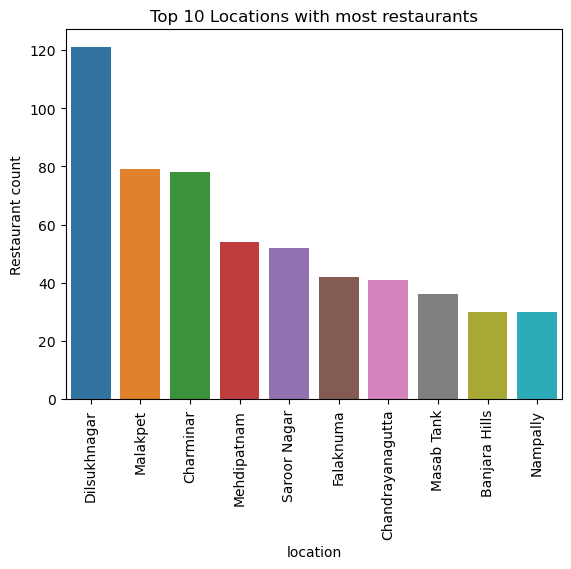

In [4]:
#top 10 locations with more number of restaurants
top_res_cnt = zomato_hyd.groupby("location")['names'].count().reset_index(name ='Restaurant_count')
top_res_cnt = top_res_cnt.sort_values('Restaurant_count', ascending=False).reset_index(drop=True)
sns.barplot(x='location', y = 'Restaurant_count', data = top_res_cnt[0:10])
# Show the plot
plt.title("Top 10 Locations with most restaurants")
plt.xticks(rotation=90)
plt.ylabel("Restaurant count")
plt.show()

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300'),
  Text(0, 350.0, '350'),
  Text(0, 400.0, '400'),
  Text(0, 450.0, '450')])

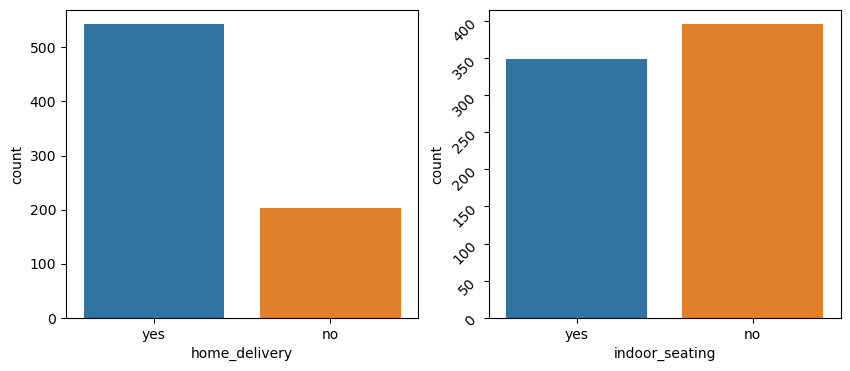

In [5]:
# Lets look at distribution of Online Orders and Table Booking Variables
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.countplot(x=zomato_hyd['home_delivery'],ax=ax1)
sns.countplot(x=zomato_hyd['indoor_seating'],ax=ax2)
plt.yticks(rotation=45)

Text(0.5, 0, 'online order')

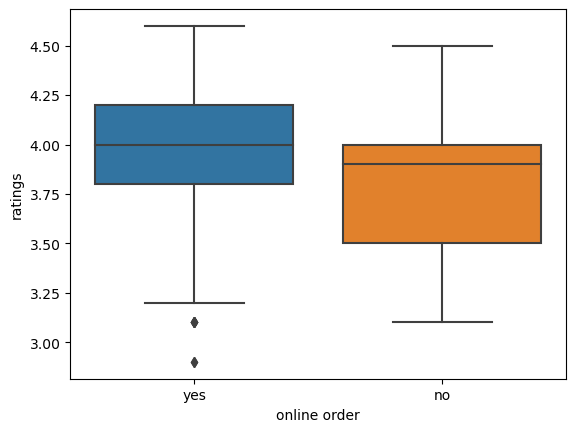

In [6]:
# Rating v/s Online Order
ax1 = fig.add_subplot(1,1,1)
sns.boxplot(x=zomato_hyd['home_delivery'],y=zomato_hyd['ratings'])
plt.xlabel("online order")

Text(0.5, 1.0, ' Price per one vs Ratings')

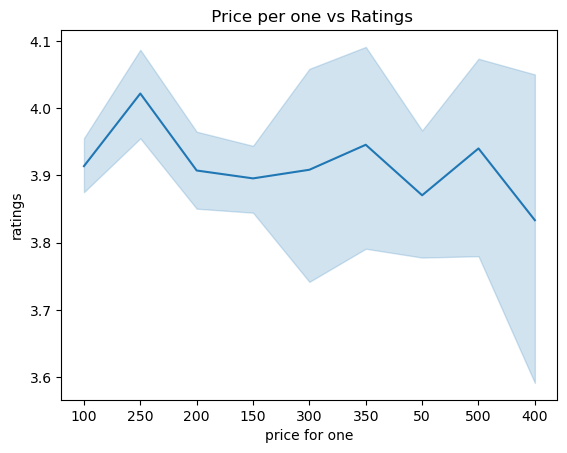

In [7]:
sns.lineplot(x=zomato_hyd['price for one'],y=zomato_hyd['ratings'])
plt.title(" Price per one vs Ratings")

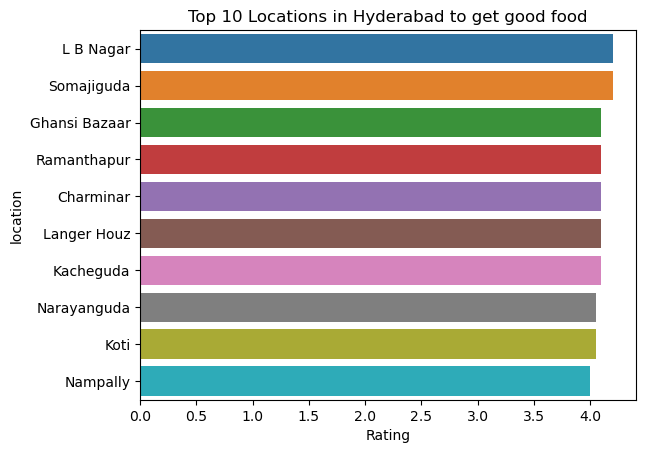

In [8]:
top_places = zomato_hyd.groupby('location')['ratings'].median().reset_index(name ='Rating')
top_places = top_places.sort_values('Rating', ascending=False).reset_index(drop=True)
sns.barplot(x='Rating',y='location',data = top_places[0:10])
plt.title("Top 10 Locations in Hyderabad to get good food")
plt.show()

In [9]:
#Most popular cuisines of Hyderabd
zomato_hyd['cuisine'] = zomato_hyd['cuisine'].apply(lambda x: x.split(','))
df_cuisine = zomato_hyd.explode('cuisine')
#zomato_hyd.groupby('cuisine')['names'].count()
#df_cuisine.groupby('cuisine')['names'].count().reset_index(name ='res_count')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, ' Desserts'),
  Text(1, 0, ' Beverages'),
  Text(2, 0, ' Chinese'),
  Text(3, 0, ' Fast Food'),
  Text(4, 0, 'North Indian'),
  Text(5, 0, ' Biryani'),
  Text(6, 0, ' North Indian'),
  Text(7, 0, 'South Indian'),
  Text(8, 0, ' Street Food'),
  Text(9, 0, ' Shake')])

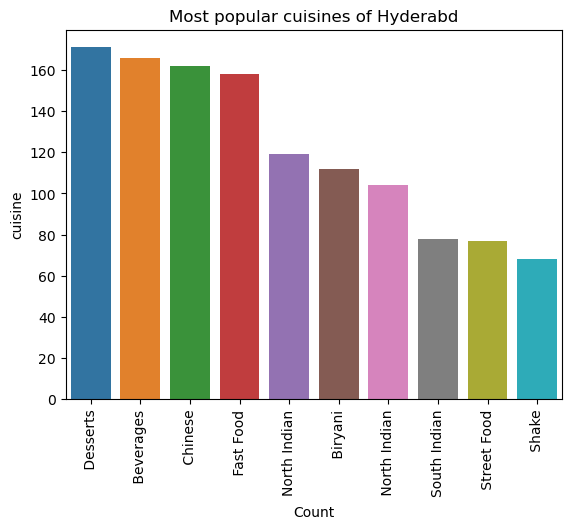

In [10]:
cuisines=df_cuisine['cuisine'].value_counts()[:10]
#print(cuisines.index)
sns.barplot(x=cuisines.index,y=cuisines,data =df_cuisine)
plt.xlabel('Count')
plt.title("Most popular cuisines of Hyderabd")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Ratings vs Delivery time')

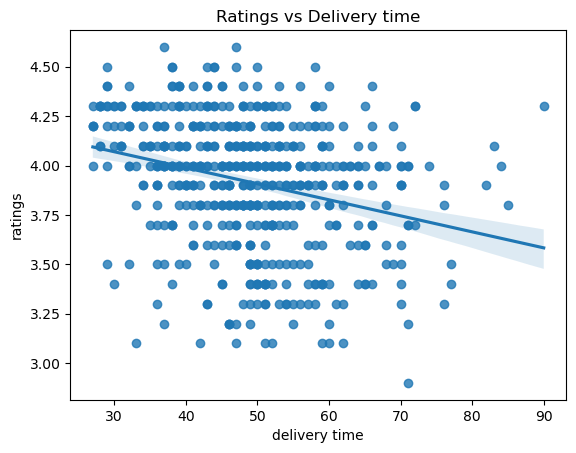

In [11]:
sns.regplot(x='delivery time',y='ratings',data = zomato_hyd)
plt.title("Ratings vs Delivery time")

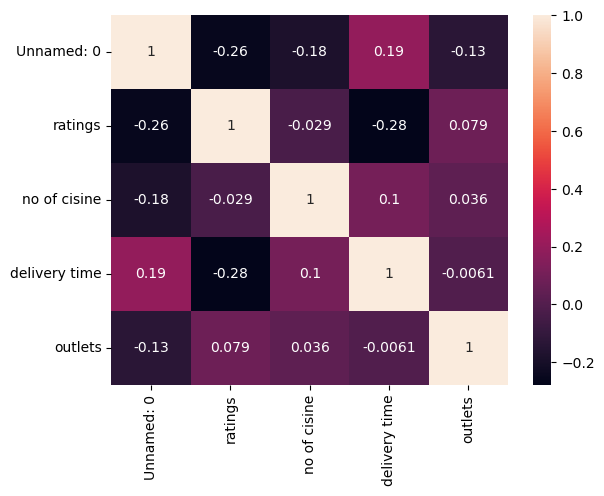

In [12]:
zomato_df = zomato_hyd.select_dtypes(include='number')
sns.heatmap(data = zomato_df.corr(),annot=True)
plt.show()